<a href="https://colab.research.google.com/github/SimranShaikh20/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/Colab Notebooks/Stock Price Prediction RNN/SBIN.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
#df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-01-1996  18.691147  18.978922  18.540184  18.823240  12.409931   
1  02-01-1996  18.894005  18.964767  17.738192  18.224106  12.014931   
2  03-01-1996  18.327892  18.568489  17.643839  17.738192  11.694577   
3  04-01-1996  17.502312  17.832542  17.223972  17.676863  11.654142   
4  05-01-1996  17.738192  17.785366  17.459852  17.577793  11.588827   

       Volume  
0  43733533.0  
1  56167280.0  
2  68296318.0  
3  86073880.0  
4  76613039.0

In [ ]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df.head()

Open       High        Low      Close      Volume
0  18.691147  18.978922  18.540184  18.823240  43733533.0
1  18.894005  18.964767  17.738192  18.224106  56167280.0
2  18.327892  18.568489  17.643839  17.738192  68296318.0
3  17.502312  17.832542  17.223972  17.676863  86073880.0
4  17.738192  17.785366  17.459852  17.577793  76613039.0

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(5659, 4)

In [ ]:
X_test.shape

(1415, 4)

In [ ]:
y_train.shape

(5659,)

In [ ]:
y_test.shape

(1415,)

In [ ]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")

    return rmse, mae, mape


In [ ]:
metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": []
}

## 1. LINEAR REGRESSION

In [ ]:
# Create a linear regression model
model1 = LinearRegression()

In [ ]:
y_train.head()

5286    257.350006
3408    129.464996
5477    279.350006
6906    588.500000
530      21.644367
Name: Close, dtype: float64

In [ ]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
rmse, mae, mape = evaluate_model(model1, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 2. SVR

In [ ]:
# Create an SVR model
model2 = SVR()

In [ ]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [ ]:
rmse, mae, mape = evaluate_model(model2, X_test_scaled, y_test)
metrics["Model"].append("SVR")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 3. Random Forest

In [ ]:
model3 = RandomForestRegressor()

In [ ]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rmse, mae, mape = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Random Forest")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 4. Gradient Boosting Models (GBM)

In [ ]:
model4 = GradientBoostingRegressor()

In [ ]:
# Train the model
model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
rmse, mae, mape = evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 5. Extreme Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [ ]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
rmse, mae, mape = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 6. AdaBoostRegressor

In [ ]:
model6 = AdaBoostRegressor()

In [ ]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
rmse, mae, mape = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 7. Decision Tree

In [ ]:
model7 = DecisionTreeRegressor()

In [ ]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
rmse, mae, mape = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 8. KNeighborsRegressor(KNN)

In [ ]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [ ]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
rmse, mae, mape = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

## 9. Artificial Neural Networks (ANN)

In [ ]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
rmse, mae, mape = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

45/45 [==============================] - 0s 1ms/step


## 10. LSTM(Long Short term Memory)

In [ ]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [ ]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [ ]:
rmse, mae, mape = evaluate_model(model10, X_test_scaled, y_test)
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

44/44 [==============================] - 0s 4ms/step


In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plot RMSE, MAE, and MAPE for each model
plt.figure(figsize=(15, 5))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Models')
plt.tight_layout()
plt.show()

In [ ]:
# MAE Plot
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE for Different Models')
plt.tight_layout()
plt.show()

In [ ]:
# MAPE Plot
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.xlabel('MAPE')
plt.title('MAPE for Different Models')
plt.tight_layout()
plt.show()

### Data Visualization Charts

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot
import plotly.graph_objs as go

# Load the data
df = pd.read_csv('/content/SBIN.csv')

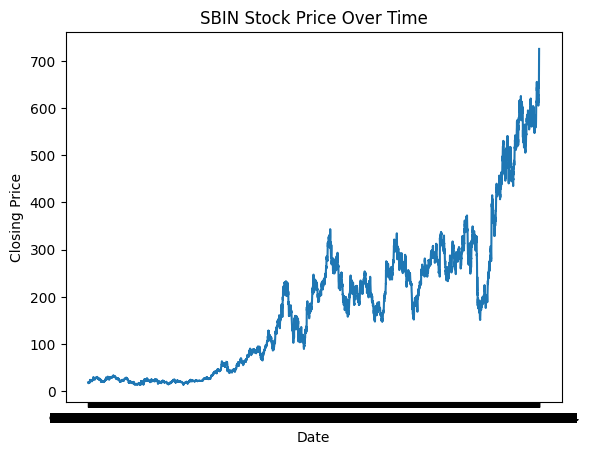

In [4]:
# Plot the closing price over time
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('SBIN Stock Price Over Time')
plt.show()

In [7]:
# Plot the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
plot(fig, filename='candlestick_chart.html')

'candlestick_chart.html'

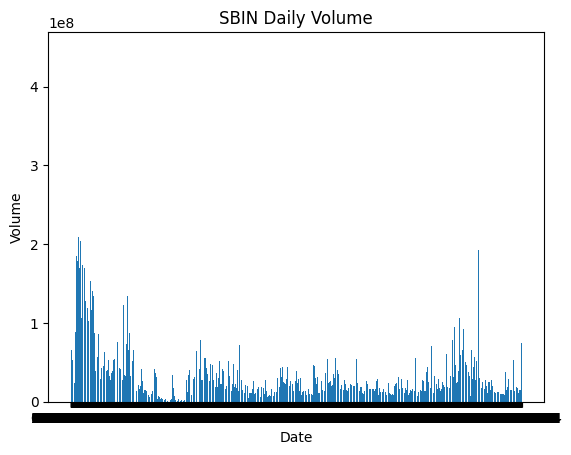

In [6]:
# Plot the daily volume
plt.bar(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('SBIN Daily Volume')
plt.show()

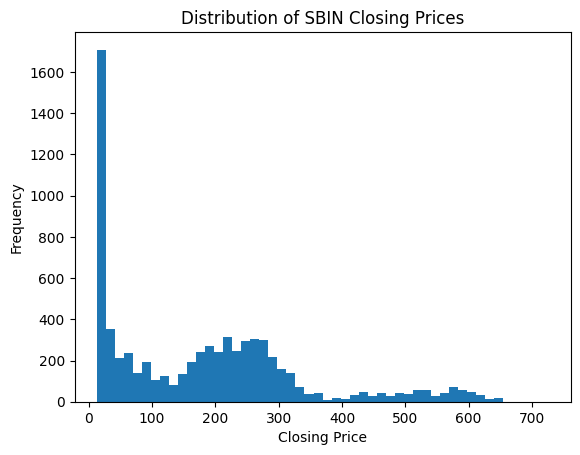

In [8]:
# Plot the histogram of closing prices
plt.hist(df['Close'], bins=50)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of SBIN Closing Prices')
plt.show()

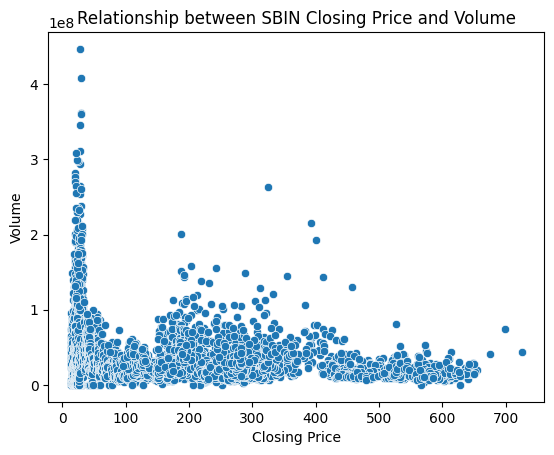

In [9]:
# Plot the scatter plot of closing price vs volume
sns.scatterplot(x=df['Close'], y=df['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Relationship between SBIN Closing Price and Volume')
plt.show()

# Moving Average Chart
A moving average chart can be used to visualize the average closing price of the stock over a certain period of time

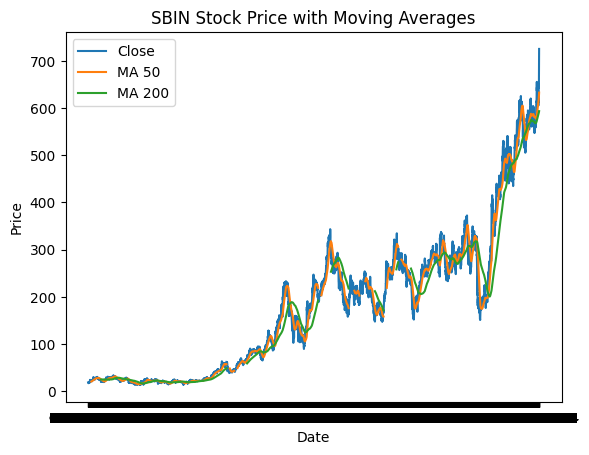

In [10]:
# Plot the moving average chart
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_50'], label='MA 50')
plt.plot(df['Date'], df['MA_200'], label='MA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBIN Stock Price with Moving Averages')
plt.legend()
plt.show()

# Relative Strength Index (RSI) Chart
The Relative Strength Index (RSI) is a type of chart that shows the momentum of a stock's price. It is used to identify overbought and oversold conditions

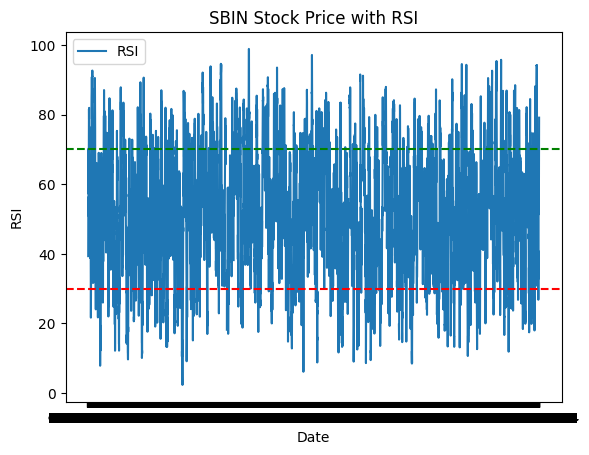

In [11]:
# Plot the RSI chart
delta = df['Close'].diff(1)
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.rolling(window=14).mean()
roll_down = down.rolling(window=14).mean().abs()
RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))

plt.plot(df['Date'], RSI, label='RSI')
plt.axhline(y=30, color='red', linestyle='--')
plt.axhline(y=70, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('SBIN Stock Price with RSI')
plt.legend()
plt.show()

## Heatmap

A heatmap is a type of chart that shows the correlation between different attributes of a stock's price

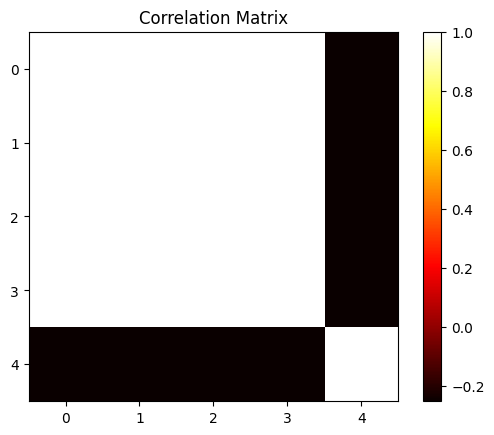

In [13]:
# Plot the heatmap
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()